Notice that, the code here is based on Julia 1.0.0

In [1]:
using Pkg;
Pkg.add("SymPy");
using SymPy;
using LinearAlgebra;

  Updating registry at `/home/jrun/.julia/registries/JuliaPro`
  Updating git-repo `https://pkg.juliacomputing.com/registry/JuliaPro`
 Resolving package versions...
  Updating `~/.julia/Project.toml`
 [no changes]
  Updating `~/.julia/Manifest.toml`
 [no changes]


In [2]:
#------------------------------------------------------------------------------
function gauss_integration(nGauss, dim)
#------------------------------------------------------------------------------
# PURPOSE:
#     Determine Gauss point's coordinate and the corresponding Gauss weight
# SYNTAX:
#     gauss_integration(nGauss, rGauss, dim)
# INPUT:
#     nGauss: the number of Gauss point
#     dim   : dimension of the problem (dim = 1 or dim = 2 or dim = 3)
# OUPUT:
#      gausspoint_coordinate: The Gauss point's coordinate
#      gausspoint_weight: The Gauss point's weight
#------------------------------------------------------------------------------

# Initiate gausspoint_coordinate and gausspoint_weight
   gausspoint_coordinate = zeros(nGauss^dim, dim)
   gausspoint_weight = Float64[];

#******** the integration domain is [-1 1] for all of direction:***************

    #------------- Limit the number of Gauss point up to 5 --------------------
    if (nGauss > 5)
        println("The number of Gauss point shouldn't be more than 5")
    end

    #------------- The number of Gauss point in one direction -----------------
    if nGauss == 1
        point = 0.0 
        weight = 2.0
        j
    elseif nGauss == 2
        point = [-0.577350269189626
                  0.577350269189626]
        weight = [1.0 1.0]

    elseif nGauss == 3
        point = [ 0
                 -0.774596669241483
                  0.774596669241483];
                
        weight = [8/9
                  5/9
                  5/9];

    elseif nGauss == 4
        point = [-0.3399810435848563
                  0.3399810435848563
                 -0.8611363115940526
                  0.8611363115940526];
               
        weight = [0.6521451548625461
                 0.6521451548625461
                 0.3478548451374538
                 0.3478548451374538];
    elseif nGauss == 5
        point = [ 0
                -0.5384693101056831
                 0.5384693101056831
                -0.9061798459386640
                 0.9061798459386640];
                
        weight = [0.5688888888888889
                 0.4786286704993665
                 0.4786286704993665
                 0.2369268850561891
                 0.2369268850561891];

    end 
    #-----------------------------DIMENSION -----------------------------------
    # One dimension problem
    if dim == 1
        for i = 1:nGauss
            gausspoint_coordinate[i,:] = [point[i]]
            push!(gausspoint_weight, weight[i])
        end
        return gausspoint_coordinate, gausspoint_weight

    # Two dimension problem
    elseif dim == 2
        n = 0
        for i = 1:nGauss
            for j = 1:nGauss
                n = n + 1
                gausspoint_coordinate[n,:] = [point[i] point[j]]
                push!(gausspoint_weight, weight[i] * weight[j])
            end
        end
        return gausspoint_coordinate, gausspoint_weight
        
    # Three dimension problem
    elseif dim == 3
        n = 0
        for i = 1:nGauss
            for j =  1:nGauss
                for k = 1:nGauss
                    n = n + 1
                    gausspoint_coordinate[n,:] = [point[i] point[j] point[k]]
                    push!(gausspoint_weight, weight[i] * weight[j] * weight[k])
                end
            end
        end
        return gausspoint_coordinate, gausspoint_weight
    end
end


gauss_integration (generic function with 1 method)

In [3]:
#= 
Example1: Calculate the integration of 
f(x) =  0.2 + 25x - 200x^2 + 675x^3 - 900x^4 + 400x^5
here x = [-1, 1]
=#


nGauss =  3
dim = 1

gauss_point, gauss_weight = gauss_integration(nGauss, dim)


f(x) =  0.2 + 25x - 200x^2 + 675x^3 - 900x^4 + 400x^5

I = 0

# loop over all of gauss points
for i = 1:length(gauss_point)
    I = I + f(gauss_point[i]) * gauss_weight[i]
end 

@show I


# Analytical solution
x = Sym("x")
I_analytical = integrate( 0.2 + 25x - 200x^2 + 675x^3 - 900x^4 + 400x^5, (x, -1, 1))
@show I_analytical

I = -492.93333333333237
I_analytical = -492.933333333333


-492.933333333333

In [4]:
#= 
Example 2: Calculate the integration of 
f(x) =  0.2 + 25x - 200x^2 + 675x^3 - 900x^4 + 400x^5
where x = [0, 2]
=#

nGauss =  3
dim = 1

# function f
f1(x) =  0.2 + 25x - 200x^2 + 675x^3 - 900x^4 + 400x^5

a = 0 # lower bound of the limit
b = 2 # upper bound of the limit
J = (b-a)/2 # Jacobian value

I = 0 
gauss_point, gauss_weight = gauss_integration(nGauss, dim)

for i = 1:length(gauss_point) # loop over Gauss points
    x = (a+b)/2 + (b-a)/2* gauss_point[i]
    I = I + J * f1(x) * gauss_weight[i]
end 
@show I


# ANALYTICAL SOLUTION
x = Sym("x")
I_analytical = integrate(0.2 + 25x - 200x^2 + 675x^3 - 900x^4 + 400x^5,(x,0,2))
@show I_analytical

I = 723.7333333333321
I_analytical = 723.733333333334


723.733333333334

In [9]:
#= 
Example 2: Calculate the integration of 
f(x) =  0.2 + 25x - 200x^2 + 675x^3 - 900x^4 + 400x^5
where x = [0, 2]
=#


# function f
f1(x) =  0.2 + 25x - 200x^2 + 675x^3 - 900x^4 + 400x^5

a = 0 # lower bound of the limit
b = 2 # upper bound of the limit
J = (b-a)/2 # Jacobian value

println("The number of Gauss Points is equal to the necessary one")
# CHECK WITH THE LOWER NUMBER OF GAUSS POINT
I = 0 
nGauss =  3
dim = 1
gauss_point, gauss_weight = gauss_integration(nGauss, dim)

for i = 1:length(gauss_point) # loop over Gauss points
    x = (a+b)/2 + (b-a)/2* gauss_point[i]
    I = I + J * f1(x) * gauss_weight[i]
end 
@show I

println("The number of Gauss Points is higher than the necessary one")
# CHECK WITH THE HIGHER NUMBER OF GAUSS POINT
I = 0 
nGauss =  4
dim = 1
gauss_point, gauss_weight = gauss_integration(nGauss, dim)

for i = 1:length(gauss_point) # loop over Gauss points
    x = (a+b)/2 + (b-a)/2* gauss_point[i]
    I = I + J * f1(x) * gauss_weight[i]
end 
@show I

println("The number of Gauss Points is less than the necessary one")
# CHECK WITH THE LOWER NUMBER OF GAUSS POINT
I = 0 
nGauss =  2
dim = 1
gauss_point, gauss_weight = gauss_integration(nGauss, dim)

for i = 1:length(gauss_point) # loop over Gauss points
    x = (a+b)/2 + (b-a)/2* gauss_point[i]
    I = I + J * f1(x) * gauss_weight[i]
end 
@show I


The number of Gauss Points is equal to the necessary one
I = 723.7333333333321
The number of Gauss Points is higher than the necessary one
I = 723.7333333333331
The number of Gauss Points is less than the necessary one
I = 528.1777777777781


528.1777777777781

In [6]:
#=
Example 3: Calculate the integration of 
f(x, y) =  0.2 + 25x - 200y^2 + 675x^3 - 900y^4 + 400x^5
where x = [-1, 1], y =[-1, 1]
=#

nGauss = 5
dim = 2

# function f
f4(x,y) =  0.2 + 25x - 200y^2 + 657x^3 - 900y^4 + 400x^5

I = 0 
gauss_point, gauss_weight = gauss_integration(nGauss, dim)

for i = 1:length(gauss_weight) # loop over Gauss points
    I = I +  f4(gauss_point[i,1], gauss_point[i,2]) * gauss_weight[i]
end 

@show I

#Analytical

x = Sym("x")
y = Sym("y")
I_analytical = integrate(0.2 + 25x - 200y^2 + 657x^3 - 900y^4 + 400x^5, (x,-1,1), (y,-1,1))
@show I_analytical

I = -985.8666666666667
I_analytical = -985.866666666667


-985.866666666667

In [7]:
#=
Example 4: Reference: https://ctec.tvu.edu.vn/ttkhai/TCC/21_Tich_phan_hai_lop.htm
Calculate integration of F = ∫∫dxdy, with the domain is limited by:
   x + y = 1
   x + y = 2
   2x - y = 1
   2x - y = 3
=#

ξ = Sym("xi")
η = Sym("eta")

N1 = 1/4*(1-ξ)*(1-η)
N2 = 1/4*(1+ξ)*(1-η)
N3 = 1/4*(1+ξ)*(1+η)
N4 = 1/4*(1-ξ)*(1+η)

X =[4/3, 5/3, 1, 2/3]
Y =[-1/3, 1/3, 1, 1/3]

x = [N1 N2 N3 N4]*X
y = [N1 N2 N3 N4]*Y

J =[diff(x,ξ) diff(y,ξ);diff(x,η) diff(y,η)]

detJ = det(J)

gauss_point, gauss_weight = gauss_integration(3,2)


I = 0  

for i = 1:length(gauss_weight)
    I += 1 * detJ(gauss_point[i,1], gauss_point[i,2]) * gauss_weight[i]
end
@show I
    
# ANALYTICAL SOLUTION
@show I_analytical = integrate(detJ,(ξ,-1,1),(η,-1,1))


I = 0.666666666666667
I_analytical = integrate(detJ, (ξ, -1, 1), (η, -1, 1)) = 0.666666666666667


0.666666666666667

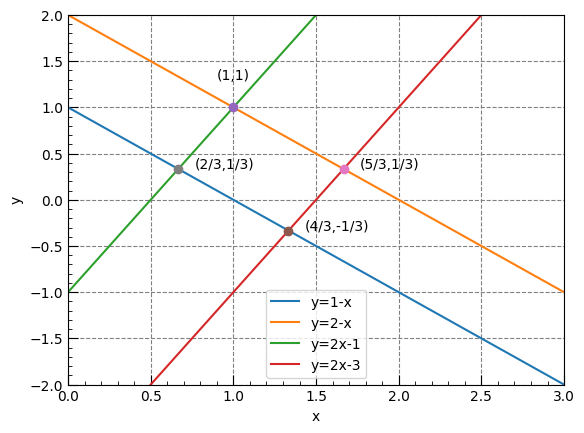

x = collect(range(0, stop=3, length=4)) = [0.0, 1.0, 2.0, 3.0]
y1 = [1 - i for i = x] = [1.0, 0.0, -1.0, -2.0]


/usr/local/lib/python2.7/dist-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


PyObject <matplotlib.legend.Legend object at 0x7f282b4d1490>

In [8]:
# Plot the domain of integartion in exercise 4
using PyPlot
@show x = collect(range(0, stop = 3, length = 4))
@show y1 = [1-i for i in x]
y2 = [2-i for i in x]
y3 = [2i - 1 for i in x]
y4 = [2i - 3 for i in x]
#using PyPlot
plot(x,y1 , label = "y=1-x")
plot(x,y2 , label = "y=2-x")
plot(x,y3 , label = "y=2x-1")
plot(x,y4 , label = "y=2x-3")

plot([1],[1],"o")
text(0.9,1.3, "(1,1)")

plot([4/3],[-1/3],"o")
text(4/3+0.1,-1/3,"(4/3,-1/3)")

plot([5/3],[1/3],"o")
text(5/3+0.1,1/3,"(5/3,1/3)")

plot([2/3],[1/3],"o")
text(2/3+0.1,1/3,"(2/3,1/3)")
xlabel("x")
ylabel("y")


tick_params(which = "both", direction = "in", color = "black")
tick_params(which="major", length=7)
tick_params(which="minor", length=3)
grid(linestyle = "--", linewidth = 0.8, color = "grey")
grid("on")
minorticks_on()
xlim(0,3)
ylim(-2,2)
legend()